# Online Retail Data Clustering
   Clustering users based on their attributes and shopping patterns using K-Means and Hierarchical Clustering.

#### The data set was taken from the UCI repository.

### Steps-
##### 1) Reading and Understanding the Data
##### 2) Data cleaning
##### 3) Preapre the data for modelling
##### 4) Modelling the data 
##### 5) Final analysis


# 1) Reading and Understanding the Data


In [1]:
# Importing necessary librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
# Reading the data set
retail=pd.read_csv("Online+Retail.csv", sep=",",encoding="ISO-8859-1")
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
# Basic Insight of the data set
retail.shape

(541909, 8)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 2) Data cleaning


In [5]:
retail.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [6]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Getting the percentage of the missing values
round(retail.isna().sum()/len(retail)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
# we can drop the rows with the missing values
retail=retail.dropna()
retail.shape

(406829, 8)

# 3) Preapre the data for modelling

In [9]:
# We will derive three merics
# 1) Recency- How recent the customer has oredered.
# 2) Frequency- How frequently the customer orders from the website.
# 3) Monetory - What money is hge contributing in total.

In [10]:
retail["amount"]=retail["UnitPrice"]*retail["Quantity"]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [11]:
# Creating a colum amount for the Monetory analysis
group_df=retail.groupby("CustomerID")["amount"].sum()
group_df=group_df.reset_index()
group_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
# Creating a colum amount for the Monetory analysis
frequncy=retail.groupby("CustomerID")["InvoiceNo"].count()
frequncy=frequncy.reset_index()
frequncy.columns=["CustomerID","Frequency"]
frequncy.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [13]:
# Merging the two dataframes
group_df=pd.merge(group_df,frequncy,on="CustomerID",how="inner")
group_df.head()

,CustomerID,amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [14]:
# Covert Invoice date to date time index format
retail["InvoiceDate"]=pd.to_datetime(retail["InvoiceDate"],format= "%d-%m-%Y %H:%M")
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [15]:
# Recency
max_date=max(retail["InvoiceDate"])

type(max_date)

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
# We find the difference between max date and invoice date
retail["diff"]=max_date-retail["InvoiceDate"]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [17]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   InvoiceNo    406829 non-null  object         
 1   StockCode    406829 non-null  object         
 2   Description  406829 non-null  object         
 3   Quantity     406829 non-null  int64          
 4   InvoiceDate  406829 non-null  datetime64[ns] 
 5   UnitPrice    406829 non-null  float64        
 6   CustomerID   406829 non-null  float64        
 7   Country      406829 non-null  object         
 8   amount       406829 non-null  float64        
 9   diff         406829 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), timedelta64[ns](1)
memory usage: 34.1+ MB


In [18]:
last_date_df=retail.groupby("CustomerID")["diff"].max()
last_date_df=last_date_df.reset_index()
last_date_df.head()

,CustomerID,diff
0,12346.0,325 days 02:49:00
1,12347.0,366 days 21:53:00
2,12348.0,357 days 17:41:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [19]:
last_date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  4372 non-null   float64        
 1   diff        4372 non-null   timedelta64[ns]
dtypes: float64(1), timedelta64[ns](1)
memory usage: 68.4 KB


In [20]:
# Merging the two dataframes
group_df=pd.merge(group_df,last_date_df,on="CustomerID",how="inner")
group_df.head()

,CustomerID,amount,Frequency,diff
0,12346.0,0.00,2,325 days 02:49:00
1,12347.0,4310.00,182,366 days 21:53:00
2,12348.0,1797.24,31,357 days 17:41:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [21]:
group_df.columns

Index(['CustomerID', 'amount', 'Frequency', 'diff'], dtype='object')

In [22]:
group_df.columns=['CustomerID', 'Amount', 'Frequency',"Recency"]
group_df.head()                  

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325 days 02:49:00
1,12347.0,4310.00,182,366 days 21:53:00
2,12348.0,1797.24,31,357 days 17:41:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [23]:
group_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  4372 non-null   float64        
 1   Amount      4372 non-null   float64        
 2   Frequency   4372 non-null   int64          
 3   Recency     4372 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 170.8 KB


In [24]:
group_df["Recency"]=group_df["Recency"].dt.days

In [25]:
group_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,366
2,12348.0,1797.24,31,357
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


{'whiskers': [<matplotlib.lines.Line2D at 0x25d9272ac40>,
 'caps': [<matplotlib.lines.Line2D at 0x25d9269e2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25d9272a970>],
 'medians': [<matplotlib.lines.Line2D at 0x25d9269e7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25d9269ea90>],
 'means': []}

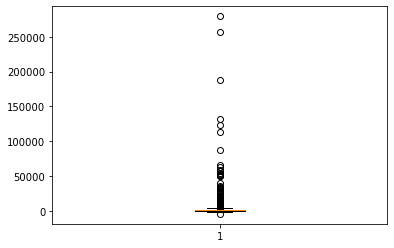

In [26]:
plt.boxplot(group_df["Amount"])

{'whiskers': [<matplotlib.lines.Line2D at 0x25d928caa00>,
 'caps': [<matplotlib.lines.Line2D at 0x25d928cafd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25d928ca730>],
 'medians': [<matplotlib.lines.Line2D at 0x25d928d85b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25d928d8880>],
 'means': []}

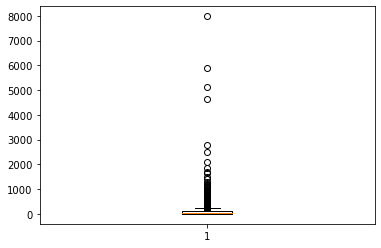

In [27]:
plt.boxplot(group_df["Frequency"])

{'whiskers': [<matplotlib.lines.Line2D at 0x25d93f53b20>,
 'caps': [<matplotlib.lines.Line2D at 0x25d93f60100>,
 'boxes': [<matplotlib.lines.Line2D at 0x25d93f53850>],
 'medians': [<matplotlib.lines.Line2D at 0x25d93f606a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25d93f60970>],
 'means': []}

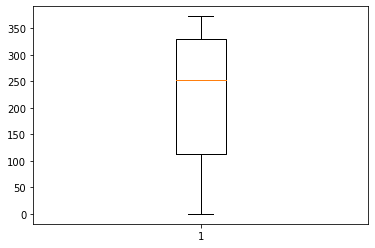

In [28]:
plt.boxplot(group_df["Recency"])

In [29]:
# Outlier Treatmemt
Q1=group_df.Amount.quantile(0.05)
Q3=group_df.Amount.quantile(0.95)
IQR=Q3-Q1
group_df=group_df[(group_df.Amount>=Q1-1.5*IQR) & (group_df.Amount<=Q3+1.5*IQR)]

In [30]:
# Outlier Treatmemt
Q1=group_df.Recency.quantile(0.05)
Q3=group_df.Recency.quantile(0.95)
IQR=Q3-Q1
group_df=group_df[(group_df.Recency>=Q1-1.5*IQR) & (group_df.Recency<=Q3+1.5*IQR)]

In [31]:
# Outlier Treatmemt
Q1=group_df.Frequency.quantile(0.05)
Q3=group_df.Frequency.quantile(0.95)
IQR=Q3-Q1
group_df=group_df[(group_df.Frequency>=Q1-1.5*IQR) & (group_df.Frequency<=Q3+1.5*IQR)]

In [32]:
# Rescaling of the variables
rmf_df=group_df[["Amount","Frequency","Recency"]]
rmf_df.head()

,Amount,Frequency,Recency
0,0.00,2,325
1,4310.00,182,366
2,1797.24,31,357
3,1757.55,73,18
4,334.40,17,309


In [33]:
import sklearn

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

In [36]:
rmf_df_scaled=scaler.fit_transform(rmf_df)

In [37]:
rmf_df_scaled.shape

(4293, 3)

In [38]:
# Seeing Hopkins Statistics to see if the Data is suitable for clsutering

In [39]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [40]:
#First convert the numpy array that you have to a dataframe
rfm_df_scaled = pd.DataFrame(rmf_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']

In [41]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_df_scaled)

0.9399047477032945

In [42]:
# The value is close to 1 therfore the data is not uniform and can be clustered


# 4) Data Modelling

In [43]:
from sklearn.cluster import KMeans

In [44]:
kmeans=KMeans(n_clusters=4,max_iter= 50)
kmeans.fit(rmf_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [45]:
kmeans.labels_

array([0, 1, 0, ..., 2, 2, 0])

## Finding the optimal Number of Clusters

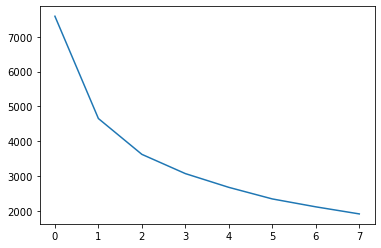

In [46]:
# 1) Elbow Curve
range_n_cluster=[2,3,4,5,6,7,8,9]
ssd=[]
for num_clusters in range_n_cluster:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rmf_df_scaled)
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)    
    

In [47]:
# Silhoutte Analysis
from sklearn.metrics import silhouette_score

In [48]:
range_n_cluster=[2,3,4,5,6,7,8,9]

for n_clusters1 in range_n_cluster:
    kmeans=KMeans(n_clusters=n_clusters1,max_iter=50)
    kmeans.fit(rmf_df_scaled)
    
    cluster_labels=kmeans.labels_
    
    silhouette_avg=silhouette_score(rmf_df_scaled,cluster_labels)
    print("The silhouettee score = {0} for the cluster number {1}.".format(silhouette_avg,n_clusters1))

The silhouettee score = 0.5332269659877191 for the cluster number 2.
The silhouettee score = 0.45472811239641303 for the cluster number 3.
The silhouettee score = 0.45265910741268073 for the cluster number 4.
The silhouettee score = 0.440175218891769 for the cluster number 5.
The silhouettee score = 0.3671372705817803 for the cluster number 6.
The silhouettee score = 0.3729254189409346 for the cluster number 7.
The silhouettee score = 0.38534021281882846 for the cluster number 8.
The silhouettee score = 0.3864614359559513 for the cluster number 9.


In [49]:
# Let us choose the optimal number of cluster =3

# Creating a final model with 3 clusters
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rmf_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [50]:
kmeans.labels_

array([0, 1, 0, ..., 2, 2, 0])

In [51]:
group_df["Cluster labels"]=kmeans.labels_
group_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster labels
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,366,1
2,12348.0,1797.24,31,357,0
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0


<AxesSubplot:xlabel='Cluster labels', ylabel='Amount'>

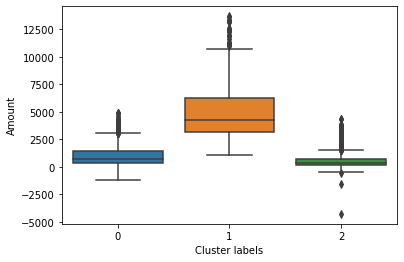

In [52]:
sns.boxplot(x="Cluster labels",y="Amount", data=group_df)

<AxesSubplot:xlabel='Cluster labels', ylabel='Recency'>

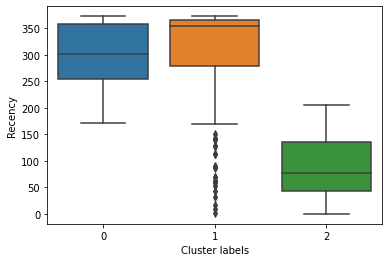

In [53]:
sns.boxplot(x="Cluster labels",y="Recency", data=group_df)

<AxesSubplot:xlabel='Cluster labels', ylabel='Frequency'>

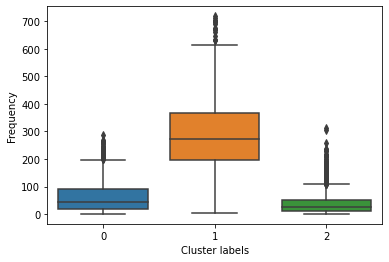

In [54]:
sns.boxplot(x="Cluster labels",y="Frequency", data=group_df)